# **<center> Module 3 - Practical Statisctic - Problems </center>**
![Immune](https://i.imgur.com/0TSSaqL.png)  

# Problem

For the following dataset, make a descriptive statistical analysis of each of the variables of the following dataset, to do this:

- Calculate all the statistics you consider necessary.
- Create some visualizations to support your analysis (boxplot, pairplots, etc)
- If applicable, indicate the possible distribution of the variables.
- Examinate the correlation of the variables among them as well as with the output variable (Diagnosis)
- If applicable, propose some transformation that can be applied to some variable and that improves the correlation.

  ### Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy.stats as st
from scipy.optimize import minimize
from paths import RAW_DIR
import os
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

matplotlib.style.use('ggplot')

sns.set_theme(style="darkgrid")

### Load data

In [2]:
df_house = pd.read_csv(os.path.join(RAW_DIR, 'train.csv'))

## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

First of all, we are going to load the data and see what we have.

In [3]:
pd.set_option('display.max_columns', None)

df_house.head()

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
2,21737,Piso en venta en geologia,"San Andrés, Madrid",126.0,114.0,4,2.0,NaN,NaN,NaN,NaN,geologia,True,geologia,NaN,NaN,3,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,901,NaN,False,1548,True,HouseType 1: Pisos,False,False,1981.0,False,True,NaN,NaN,NaN,False,True,NaN,NaN,True,True,NaN,NaN,NaN,True,NaN,en trámite,True,NaN,NaN,True,0.0,False,False,False,True
3,21736,Piso en venta en avenida Real de Pinto,"San Andrés, Madrid",120.0,100.0,5,2.0,NaN,NaN,NaN,NaN,Avenida Real de Pinto,True,Avenida Real de Pinto,NaN,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,884,NaN,False,1583,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,True,True,False,True,NaN,True,True,True,True,NaN,NaN,NaN,True,F,True,NaN,NaN,True,0.0,False,False,True,False
4,21735,Piso en venta en San Andrés,"Villaverde, Madrid",125.0,100.0,3,2.0,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,2,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,912,NaN,False,1588,True,HouseType 1: Pisos,False,False,NaN,NaN,NaN,NaN,True,True,False,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,False,False,True,False


In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17448 entries, 0 to 17447
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            17448 non-null  int64  
 1   title                         17448 non-null  object 
 2   subtitle                      17448 non-null  object 
 3   sq_mt_built                   17348 non-null  float64
 4   sq_mt_useful                  6575 non-null   float64
 5   n_rooms                       17448 non-null  int64  
 6   n_bathrooms                   17434 non-null  float64
 7   n_floors                      1163 non-null   float64
 8   sq_mt_allotment               1146 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   13056 non-null  object 
 12  is_exact_address_hidden       17448 non-null  bool   
 13  s

Now, we are going to check the percentage of missing values in each column. If there are more than 30% of missing values, we will drop the column. Thats because we can't make any assumption about the missing values and the analysis of those features may be biased.

In [5]:
(df_house.isna().mean()*100).round(2)

id                                0.00
title                             0.00
subtitle                          0.00
sq_mt_built                       0.57
sq_mt_useful                     62.32
n_rooms                           0.00
n_bathrooms                       0.08
n_floors                         93.33
sq_mt_allotment                  93.43
latitude                        100.00
longitude                       100.00
raw_address                      25.17
is_exact_address_hidden           0.00
street_name                      27.19
street_number                    71.22
portal                          100.00
floor                            12.01
is_floor_under                    5.34
door                            100.00
neighborhood_id                   0.00
operation                         0.00
rent_price                        0.00
rent_price_by_area              100.00
is_rent_price_known               0.00
buy_price_by_area                 0.00
is_buy_price_known       

### Data Cleaning

1. Filter out columns that have more than 30% missing values using the `filter()` method and the `isna()` function. This is done to remove columns that have too many missing values and are not useful for analysis.

3. In the `assign()` method. We will convert the `n_bathrooms` column to an integer and also the `is_floor_under`, `has_lift`, `is_exterior`, and `is_new_development` columns to boolean values using the `astype()` method. Additionally, extract the house type ID from the `house_type_id` column using the `str.split()` and `str.strip()` methods. Finally, extract the mean neighborhood buy price by area from the `neighborhood_id` column using regular expressions and the `str.extract()` method.
   
4. Next, we will remove the entries that have a `n_rooms` or `n_bathrooms` value of 0 using the `query()` method. This is done because a house cannot have 0 rooms nor 0 bathrooms.

5. Then drop several columns from the DataFrame using the `drop()` method. These columns are not needed for the analysis and can be safely removed. The resulting DataFrame, `df_house_clean`, is now ready for exploratory data analysis.

To summarize, we will perform data cleaning and transformation on the Dataframe of house information. Filtering out missing values, converting columns to the correct data types, extracting information from columns using string methods and regular expressions, and dropping columns that are not needed for analysis. The resulting DataFrame, `df_house_clean`, is now ready for exploratory data analysis.

In [6]:
df_house_clean = (df_house
                    .filter(df_house.columns[df_house.isna().mean() < 0.3])
                    .assign(
                            n_bathrooms = lambda df: df.n_bathrooms.fillna(0).astype('int'),
                            is_floor_under = lambda df: df.is_floor_under.astype('bool'),
                            has_lift = lambda df: df.has_lift.astype('bool'),
                            is_exterior = lambda df: df.is_exterior.astype('bool'),
                            is_new_development = lambda df: df.is_new_development.astype('bool'),
                            house_type_id = lambda df: df.house_type_id.str.split(':').str[1].str.strip(),
                            neighborhood_buy_price_by_area_mean = lambda df: df.neighborhood_id.str.extract(r'\(([\d.]+) €/m2\)').astype('float'),
                    )
                    .query('n_rooms > 0 and n_bathrooms > 0')
                    .drop(columns=['id', 'title', 'subtitle', 'is_exact_address_hidden', 'rent_price', 'is_rent_price_known', 'is_buy_price_known', 'raw_address', 'street_name', 'operation', 'neighborhood_id'])
                )


In [7]:
df_house_clean.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,has_lift,is_exterior,energy_certificate,has_parking,neighborhood_buy_price_by_area_mean
0,94.0,2,2,1,False,1535,Pisos,False,False,True,True,no indicado,False,1617.18
1,64.0,2,1,Bajo,True,1717,Pisos,False,False,True,True,en trámite,False,1617.18
2,126.0,4,2,3,False,1548,Pisos,False,False,False,True,en trámite,True,1617.18
3,120.0,5,2,1,False,1583,Pisos,False,False,False,True,F,True,1617.18
4,125.0,3,2,2,False,1588,Pisos,False,False,False,True,no indicado,False,1617.18


In [8]:
df_house_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17085 entries, 0 to 17447
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sq_mt_built                          16985 non-null  float64
 1   n_rooms                              17085 non-null  int64  
 2   n_bathrooms                          17085 non-null  int64  
 3   floor                                15001 non-null  object 
 4   is_floor_under                       17085 non-null  bool   
 5   buy_price_by_area                    17085 non-null  int64  
 6   house_type_id                        17080 non-null  object 
 7   is_renewal_needed                    17085 non-null  bool   
 8   is_new_development                   17085 non-null  bool   
 9   has_lift                             17085 non-null  bool   
 10  is_exterior                          17085 non-null  bool   
 11  energy_certificate               

### Data Analysis

First, we will use the `describe()` method to get the descriptive statistics of the houses Dataframe. This is done to get a general idea of the distribution of the features in the dataset.

In [9]:
df_house_clean.describe()

,sq_mt_built,n_rooms,n_bathrooms,buy_price_by_area,neighborhood_buy_price_by_area_mean
count,16985.000000,17085.000000,17085.000000,17085.000000,17019.000000
mean,149.226082,3.065086,2.113257,4018.208546,3799.043420
std,135.612990,1.450818,1.410522,1913.718634,1451.567283
min,16.000000,1.000000,1.000000,536.000000,1308.890000
25%,71.000000,2.000000,1.000000,2545.000000,2443.620000
50%,101.000000,3.000000,2.000000,3718.000000,3810.080000
75%,166.000000,4.000000,2.000000,5000.000000,4807.690000
max,999.000000,24.000000,16.000000,18889.000000,8392.430000


After that, we will use a series of visualizations (histograms, boxplots and scatterplots) to get a better understanding of the distribution of the features in the dataset.

Then, we will use the `corr()` method to get the correlation matrix of the features in the dataset. This is done to get a better understanding of the relationship between the features in the dataset.

Finally, we will make the ANOVA test to check if there are a relationship between the categorical variables (energy_certificate, floor, house_type_id) and the continuous variables in the dataset.

In [10]:
df_house_rooms1_6 = df_house_clean.query('n_rooms <= 6')

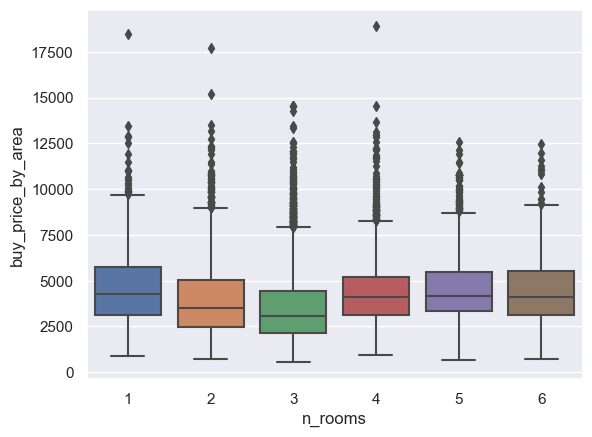

In [11]:
sns.boxplot(data = df_house_rooms1_6, x='n_rooms', y='buy_price_by_area');

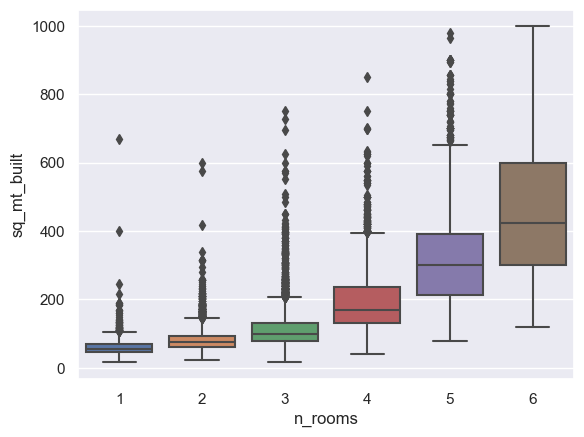

In [12]:
sns.boxplot(data = df_house_rooms1_6, x='n_rooms', y='sq_mt_built');


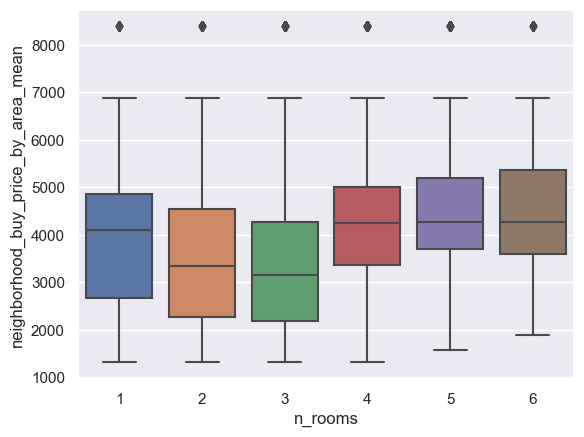

In [13]:
sns.boxplot(data = df_house_rooms1_6, x='n_rooms', y='neighborhood_buy_price_by_area_mean');

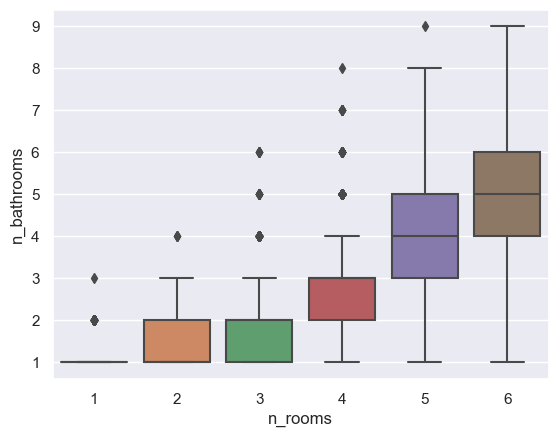

In [14]:
sns.boxplot(data = df_house_rooms1_6, x='n_rooms', y='n_bathrooms');


Those boxplots shown the distribution of all the continuous variables in the dataset grouped by the number of rooms. We can see that when the number of rooms increases, the price, the area in m2 and the bathrooms also increase. This is expected because a house with more rooms is usually bigger and more expensive. Note that this doesn't happen with the price by m2, which is almost constant for all the number of rooms.

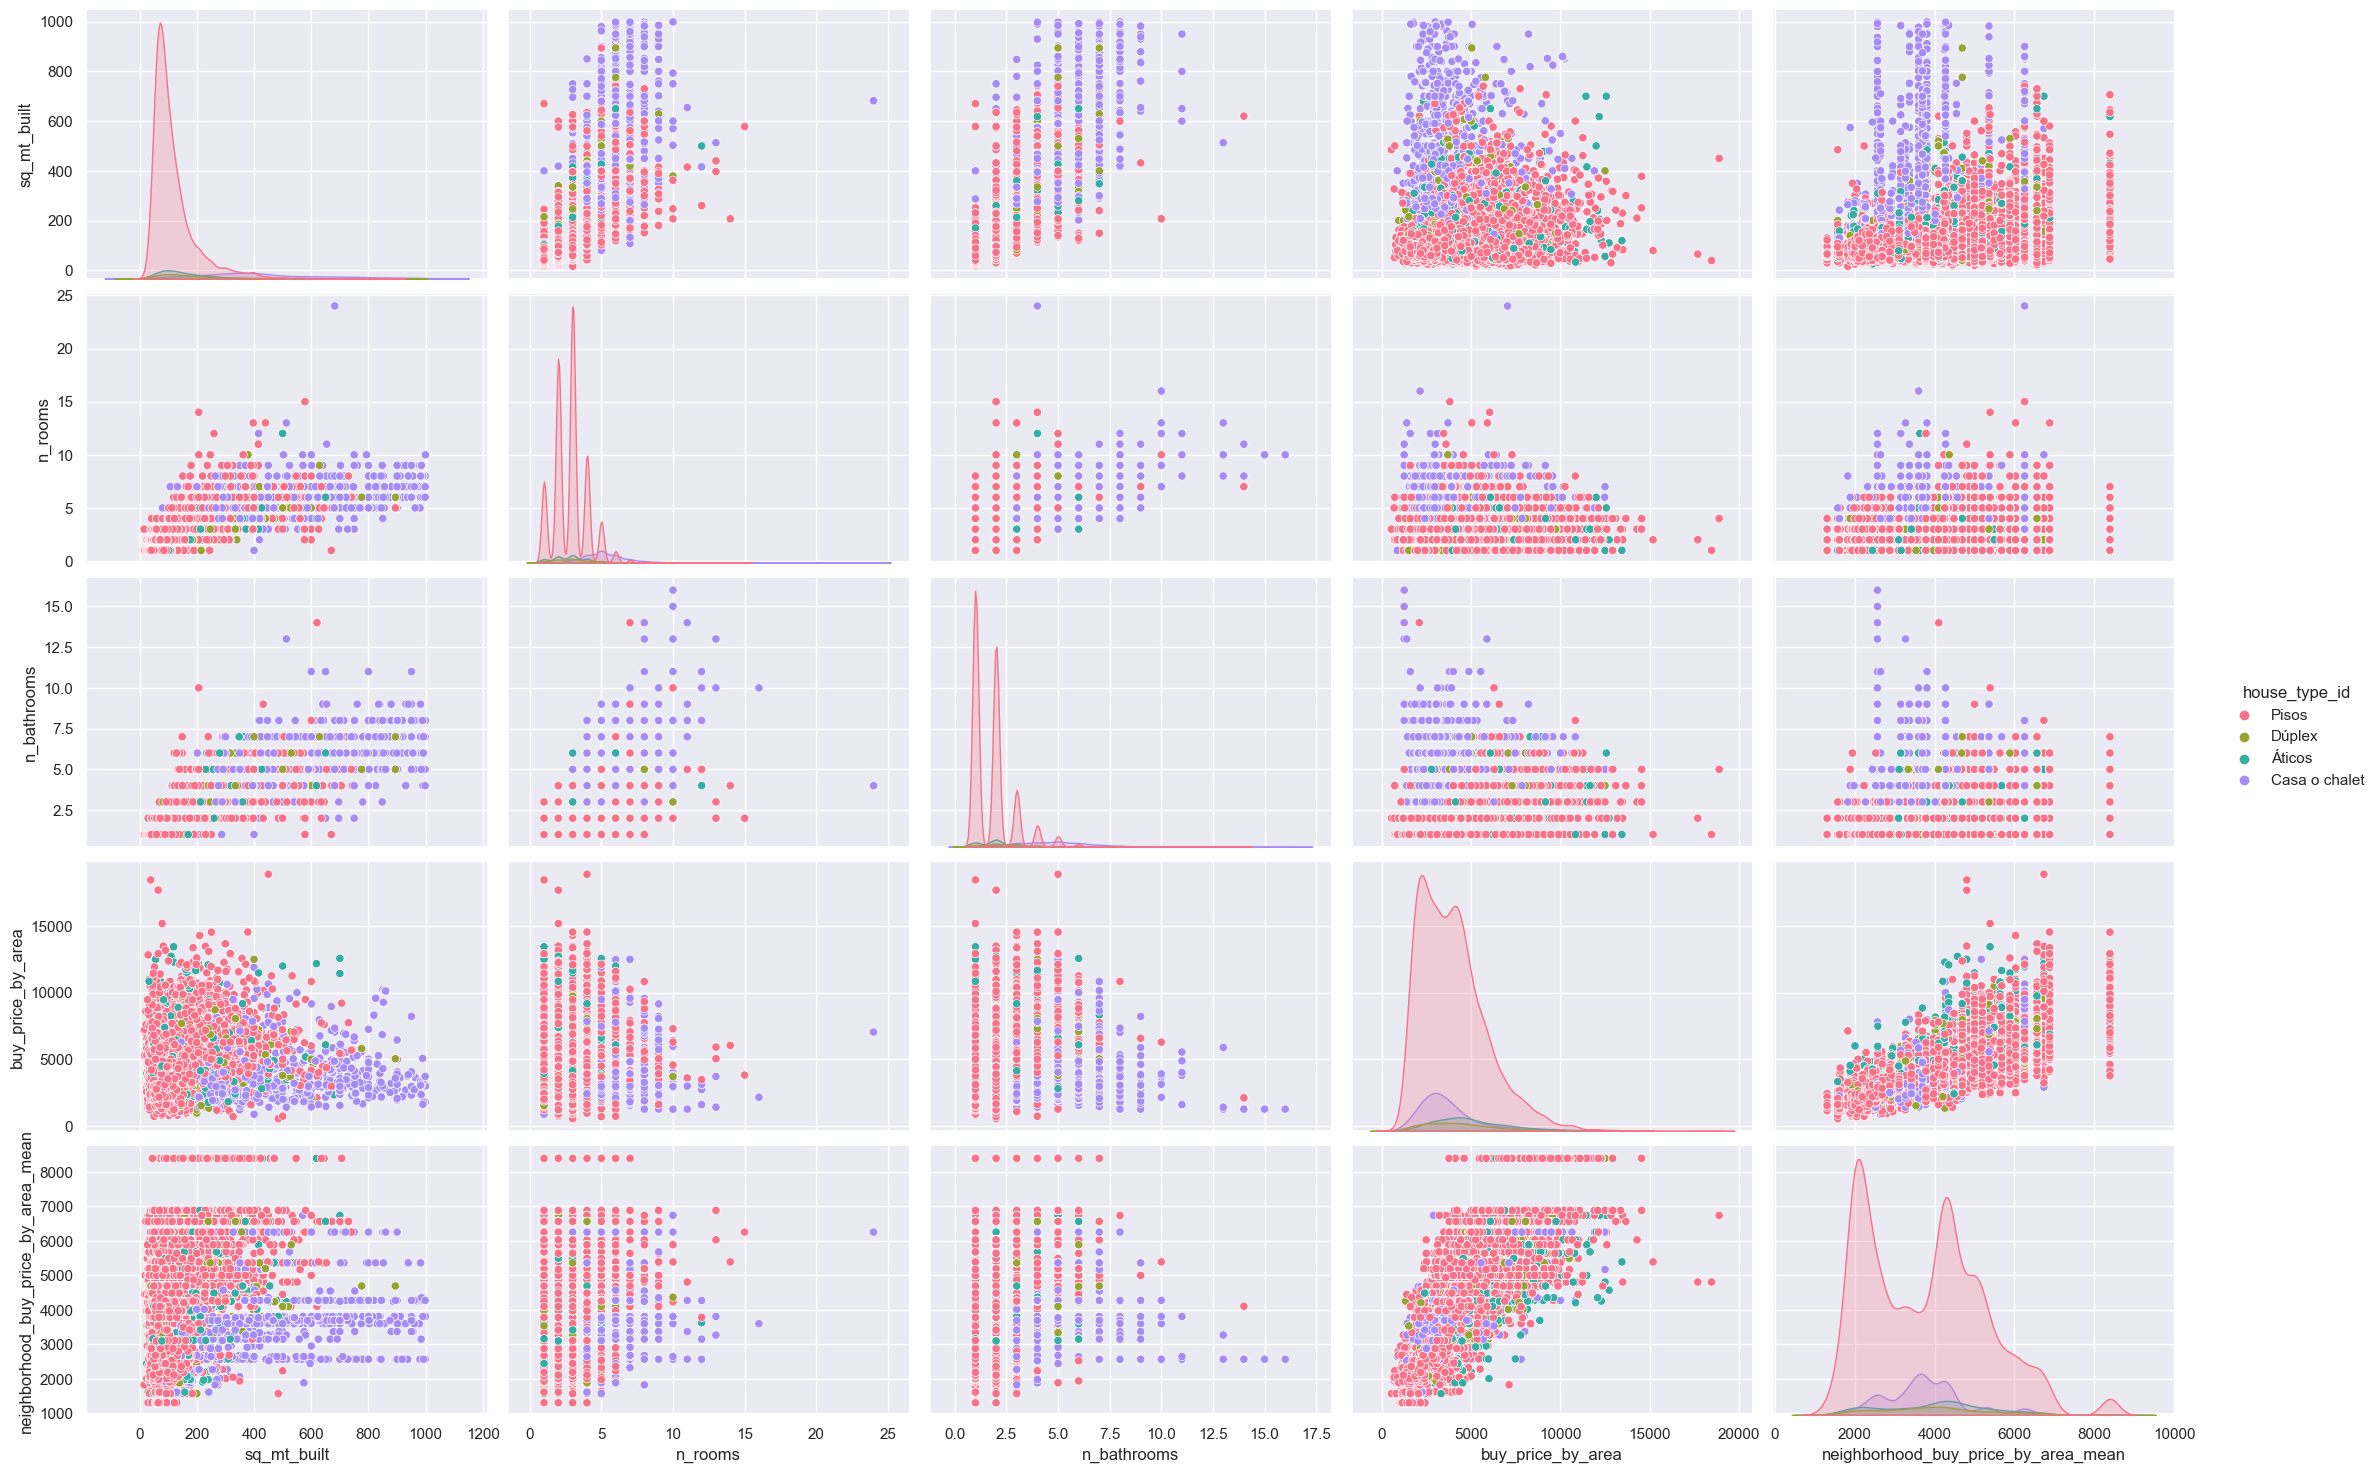

In [15]:
sns.pairplot(df_house_clean.filter(['buy_price_by_area', 'neighborhood_buy_price_by_area_mean','sq_mt_built','n_rooms','n_bathrooms','house_type_id']), hue='house_type_id', palette='husl', height=3, aspect=1.5, diag_kind='kde');

The pairplot shows the relationship between all the numeric variables in the dataset gouped by house type.

We can see that the price and the area in m2 are highly correlated, which is expected because the price of a house is usually proportional to its area.

Also, we can see that the number of rooms and the number of bathrooms are highly correlated, which is expected because a house with more rooms usually has more bathrooms.

The mean of the price by m2 by neighborhood has a correlation with the price by m2 of the house. This is expected because the price of a house is usually proportional to the price of the houses in the neighborhood.

The area in m2 and the number of rooms\bathrooms are also highly correlated, which is expected because a house with more rooms\bathrooms is usually bigger.

Now we will check the distribution of all the variables in the dataset one by one.

For the continuous variables, we will use a KS test with some of the most common distributions (Weibull, Normal, Exponential, Lognormal, Inverse Gauss, etc) to check if the distribution of the variable is similar to any of those distributions. If the p-value of the test is less than 0.05, we will reject the null hypothesis and assume that the distribution of the variable is not similar to the distribution of the tested distribution. That's why, from all of the tested distributions, we will choose the one with the highest p-value.

> Note that this is not a definitive test, but it can give us a general idea of the distribution of the variable.

ref: [Intro to Probability Distributions and Distribution Fitting with Python’s SciPy](https://medium.com/p/3da89bf60565)

In [16]:
DIST_NAMES = ['weibull_min', 'norm', 'weibull_max', 'beta',
              'invgauss', 'uniform', 'gamma', 'expon',
              'lognorm', 'pearson3', 'triang']

In [17]:
def fitdist(data, dist):
    dist = getattr(st, dist)
    fitted = dist.fit(data, floc=0.0)
    ks = st.kstest(data, dist.name, fitted, N=len(data))
    res = (dist.name, ks[1], ks[0], *fitted)
    return res

def best_fit_distribution(data, column_name):
    """Model data by finding best fit distribution to data"""

    # ignore warnings
    warnings.filterwarnings('ignore')

    data = data[column_name].dropna()

    # call fitting function for all distributions in list
    res = [fitdist(data, D) for D in DIST_NAMES]
    # convert the fitted list of tuples to dataframe
    pd.options.display.float_format = '{:,.3f}'.format
    df = (pd
        .DataFrame(res, columns=["distribution", "KS p-value", "KS test", "param1", "param2", "param3", "param4"])
        .assign(
            distobj = [getattr(st, dist) for dist in DIST_NAMES]
        )
        .sort_values(by=["KS p-value"], ascending=False)
        .reset_index()
        .drop("index", axis=1)
    )

    # plot the best fit distribution
    D_name = df.iloc[0,0]
    D = df.iloc[0,7]
    params = df.iloc[0,3:7]
    params = [p for p in params if ~np.isnan(p)]
    rv = D(*params)

    # calibrate x-axis by finding the 1% and 99% quantiles in percent point function
    x = np.linspace(
                D.ppf(0.01, *params),
                D.ppf(0.99, *params), 100)

    pdf = pd.Series(rv.pdf(x), x)

    # plot the original data histogram and the best fit distribution
    plt.figure(figsize=(8,4))
    ax = pdf.plot(lw=2, label= D_name + ' PDF', legend=True)
    data.plot(kind='hist', bins=80, density=True, label='Data', legend=True, ax=ax)

    ax.set_title('Distribution plot for ' + column_name + '. \nBest Distribution: ' + D_name)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.ticklabel_format(style='plain', axis='x')
    plt.show()

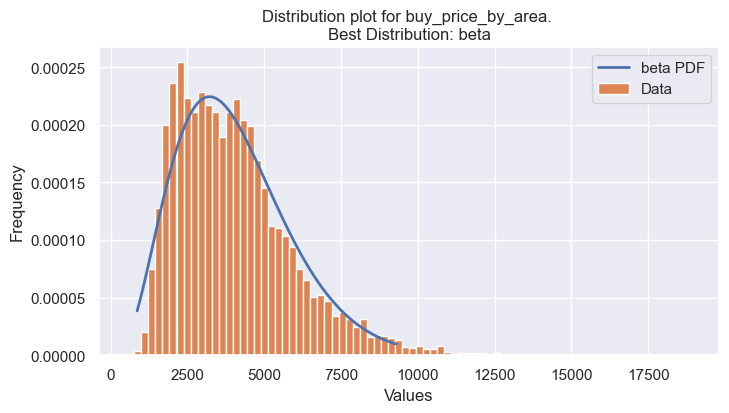

In [18]:
best_fit_distribution(df_house_clean, 'buy_price_by_area')

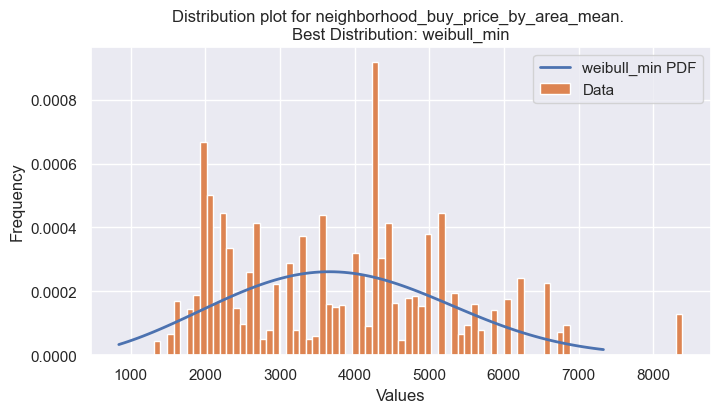

In [19]:
best_fit_distribution(df_house_clean, 'neighborhood_buy_price_by_area_mean')


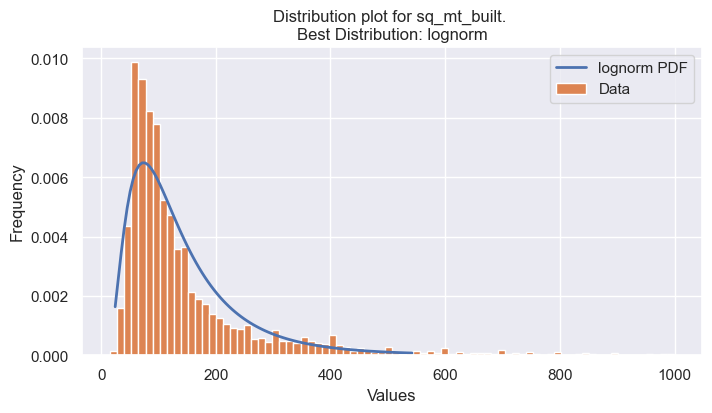

In [20]:
best_fit_distribution(df_house_clean, 'sq_mt_built')

For the discrete variables, we will use a Chi-Square test to check if the distribution of the variable is similar to some of the most popular discrete distributions (geom and poisson). If the p-value of the test is less than 0.05, we will reject the null hypothesis and assume that the distribution of the variable is not similar to the distribution of the tested distribution. That's why, from all of the tested distributions, we will choose the one with the highest p-value.

In [21]:
DISC_DIST_NAMES = ['geom', 'poisson']

In [22]:
def optimize_parameters(data, distribution_name):
    dist = getattr(st, distribution_name)

    if distribution_name == 'poisson':
        initial_guess = [data.mean()]  # Initial guess for lambda
    elif distribution_name == 'geom':
        initial_guess = [1 / (data.mean() + 1)]  # Initial guess for p
    else:
        raise ValueError("Unsupported distribution. Supported distributions: binomial, poisson, geometric, bernoulli")

    def likelihood(p):
        return -np.sum(dist.logpmf(data, p))

    res = minimize(likelihood, initial_guess, method='Nelder-Mead', tol=1e-6)
    optimal_parameter = res.x[0]

    return optimal_parameter

def chisquared_discrete_test(data, distribution_name):
    observed_frequencies = np.bincount(data)
    dist = getattr(st, distribution_name)

    # Optimize parameter for the specified distribution
    optimal_parameter = optimize_parameters(data, distribution_name)

    # Calculate expected frequencies using the optimized parameter
    if distribution_name == 'geom':
        expected_frequencies = dist.pmf(np.arange(1, len(observed_frequencies) + 1), optimal_parameter) * len(data)
    elif distribution_name == 'poisson':
        expected_frequencies = dist.pmf(np.arange(len(observed_frequencies)), optimal_parameter) * len(data)
    else:
        raise ValueError("Unsupported distribution.")

    if observed_frequencies[0] == 0:
        observed_frequencies = observed_frequencies[1:]
        expected_frequencies = expected_frequencies[:-1]

    # sum of expected frequencies should be equal to the sum of observed frequencies
    expected_frequencies = expected_frequencies * (observed_frequencies.sum() / expected_frequencies.sum())

    chi2_stat, p_value = st.chisquare(observed_frequencies, f_exp=expected_frequencies)

    return (distribution_name, p_value, chi2_stat, expected_frequencies)

def best_fit_discrete_distribution(data, column_name):
    """Model data by finding best fit distribution to data"""

    # ignore warnings
    warnings.filterwarnings('ignore')

    data = data[column_name].dropna()

    # call fitting function for all distributions in list
    res = [chisquared_discrete_test(data, D) for D in DISC_DIST_NAMES]
    # convert the fitted list of tuples to dataframe
    pd.options.display.float_format = '{:,.3f}'.format
    df = (pd
        .DataFrame(res, columns=["distribution", "p-value", "chi2-stat", "pmf"])
        .sort_values(by=["p-value", "chi2-stat"], ascending=False)
        .assign(
            distobj = [getattr(st, dist) for dist in DISC_DIST_NAMES]
        )
        .reset_index()
        .drop("index", axis=1)
    )

    # plot the best fit distribution
    D_name = df.iloc[0,0]

    x = np.arange(1, np.bincount(data).shape[0])
    pmf = pd.Series(df.iloc[0,3], x)

    # bar plot of observed frequencies vs expected frequencies under the best fit distribution
    plot_df = pd.DataFrame({'x': x, D_name + ' pmf': pmf, 'observed': np.bincount(data)[1:]})
    plot_df = plot_df.melt(id_vars=['x'], var_name='type', value_name='frequency')

    # plot the original data histogram and the best fit distribution
    plt.figure(figsize=(8,4))

    # bar plot
    ax = sns.barplot(data=plot_df, x='x', y='frequency', hue='type')

    ax.set_title('Distribution plot for ' + column_name + '. \nBest Distribution: ' + D_name )
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    plt.show()

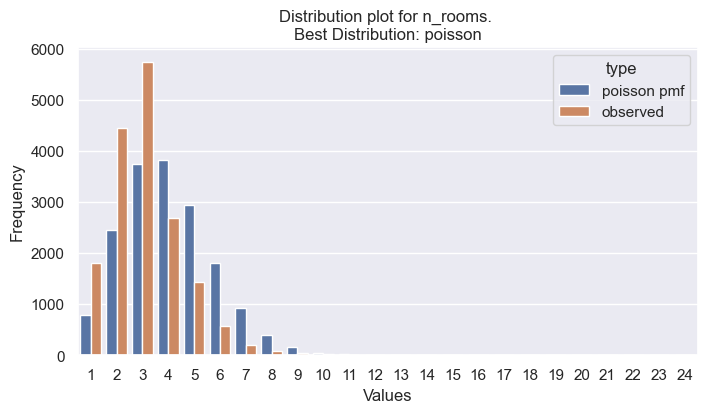

In [23]:
best_fit_discrete_distribution(df_house_clean, 'n_rooms')

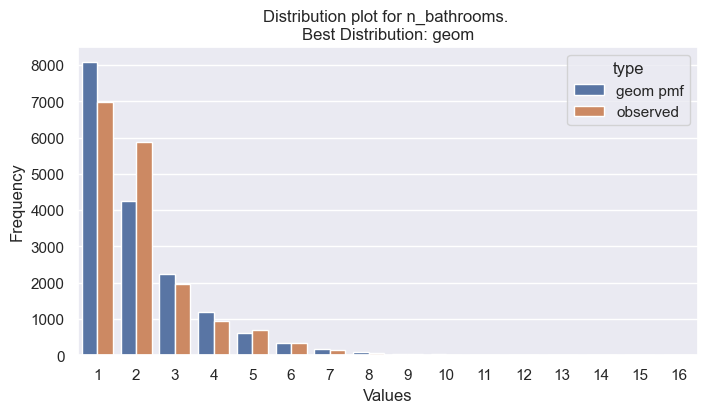

In [24]:
best_fit_discrete_distribution(df_house_clean, 'n_bathrooms')

In the case of the categorical variables, we will plot the distribution of the variable using a barplot. This is done to get a general idea of the distribution of the variable because we can't use a statistical test to check the distribution of a categorical variable.

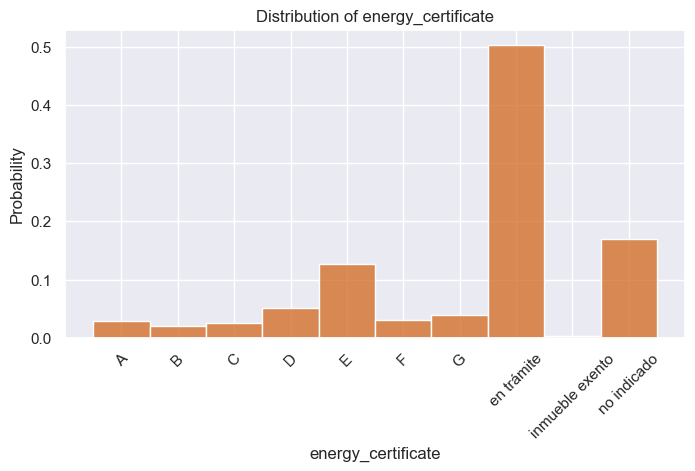

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_house_clean.sort_values('energy_certificate') , x='energy_certificate', color='chocolate', bins=25 , discrete=True, stat='probability')
plt.title('Distribution of energy_certificate')
plt.xticks(rotation=45);


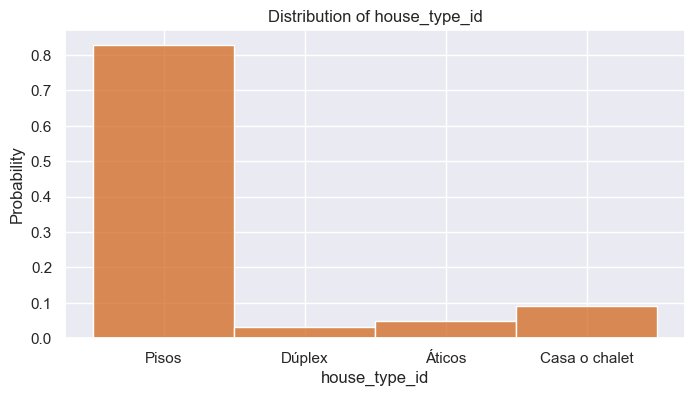

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_house_clean, x='house_type_id', color='chocolate', bins=25 , discrete=True, stat='probability')
plt.title('Distribution of house_type_id');

In the case of the boolean variables, we will plot the distribution of the variable using a bar plot. All the boolean variables in this dataset follow a Bernoulli distribution, Bernoulli distribution assumes independent trials, where the probability of 'success' is constant across different houses.

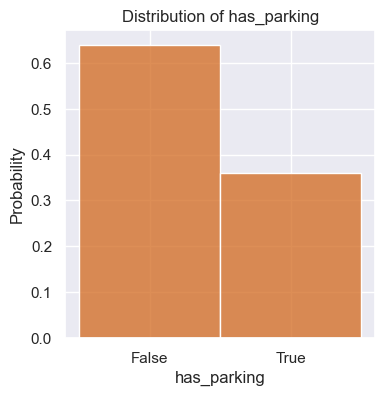

In [27]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df_house_clean, x='has_parking', color='chocolate', bins=2 , discrete=True, stat='probability')
plt.title('Distribution of has_parking')
plt.xticks([0,1], ['False','True']);

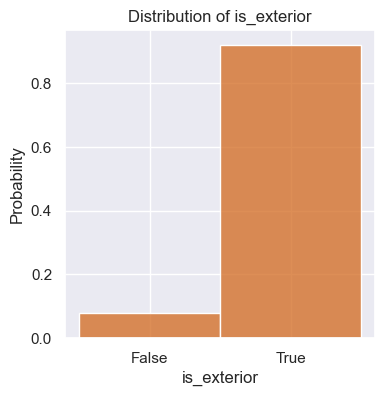

In [28]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df_house_clean, x='is_exterior', color='chocolate', bins=2 , discrete=True, stat='probability')
plt.title('Distribution of is_exterior')
plt.xticks([0,1], ['False','True']);

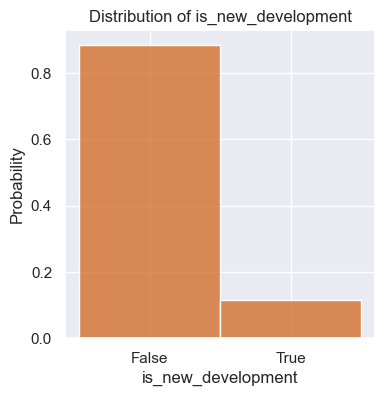

In [29]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df_house_clean, x='is_new_development', color='chocolate', bins=2 , discrete=True, stat='probability')
plt.title('Distribution of is_new_development')
plt.xticks([0,1], ['False','True']);

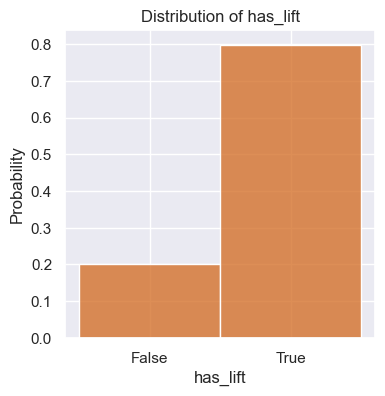

In [30]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df_house_clean, x='has_lift', color='chocolate', bins=2 , discrete=True, stat='probability')
plt.title('Distribution of has_lift')
plt.xticks([0,1], ['False','True']);


Now we will find the correlation between the variables in the dataset. We will use the Pearson and Spearmann correlation coefficients to check the correlation between the continuous variables and the categorical variables and show the results in a heatmap.

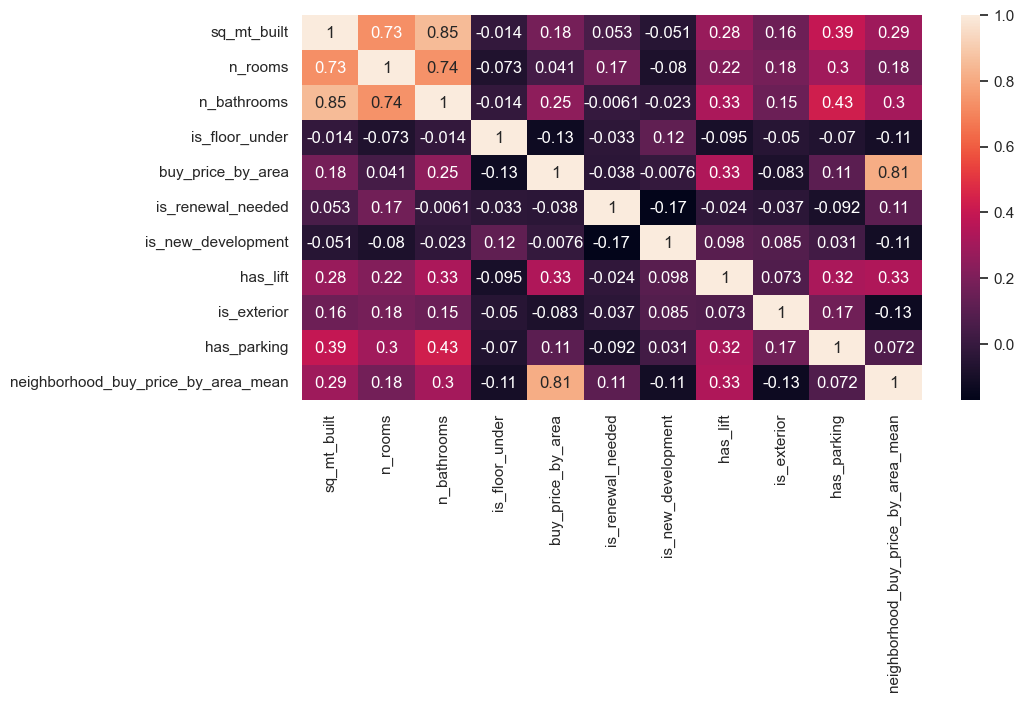

In [31]:
corr = df_house_clean.corr(numeric_only = True)

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True);

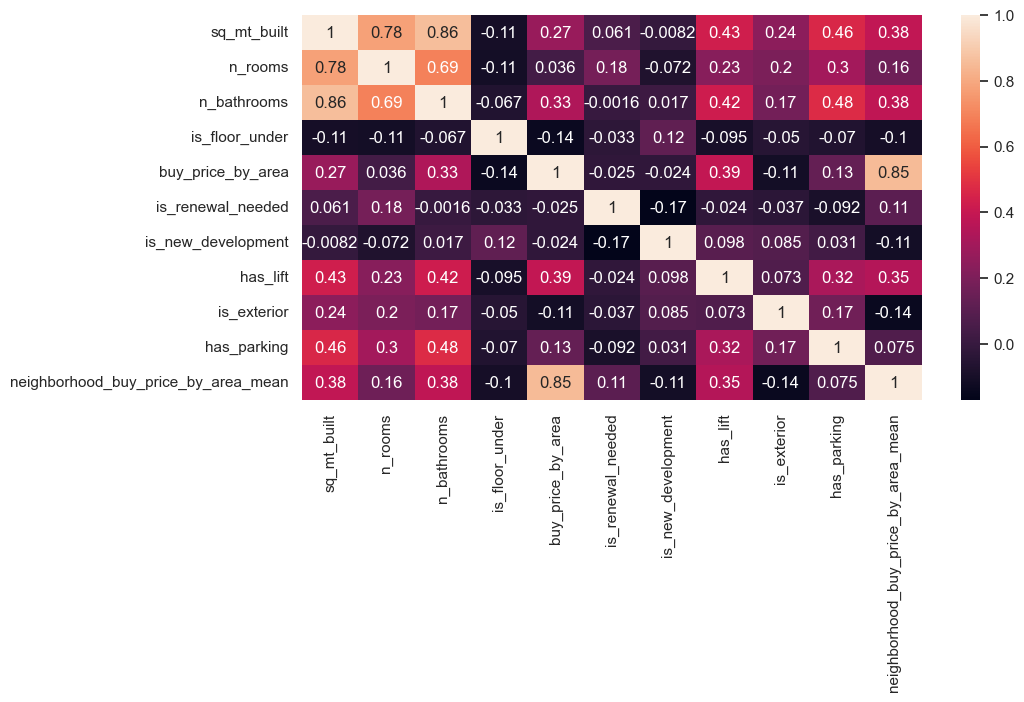

In [32]:
corr = df_house_clean.corr(numeric_only = True, method = 'spearman')

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True);

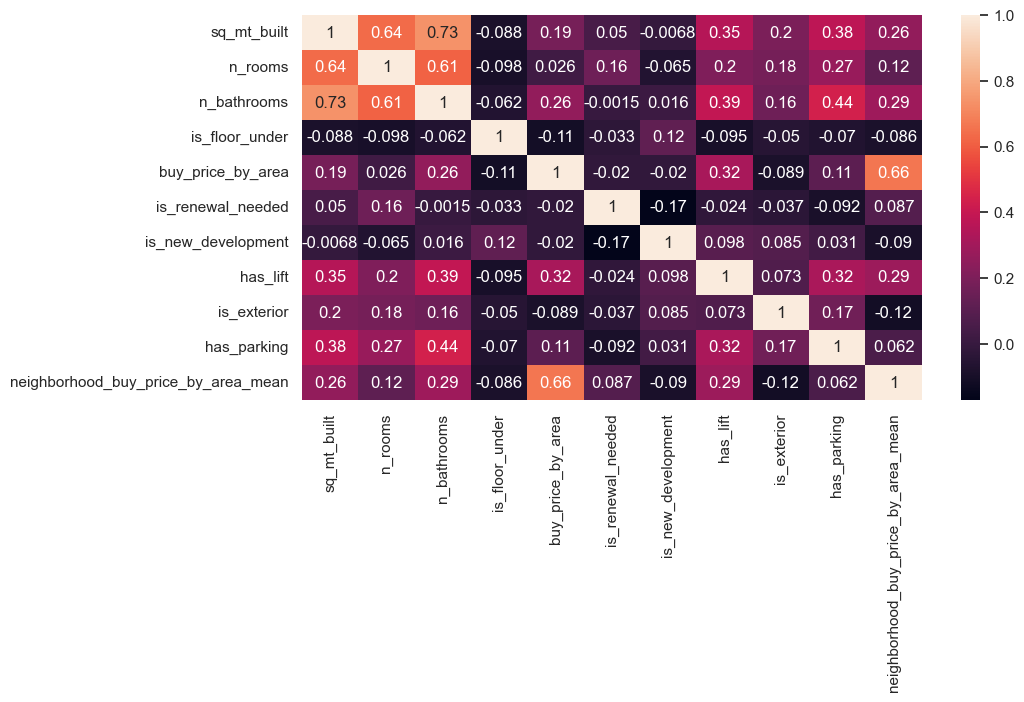

In [33]:
corr = df_house_clean.corr(numeric_only = True, method = 'kendall')

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True);

We can corroborate some of the assumptions made in the previous section when we analyzed the pairplot. For example, the price and the area in m2 are highly correlated, which is expected because the price of a house is usually proportional to its area. Also, the number of rooms and the number of bathrooms are highly correlated, which is expected because a house with more rooms usually has more bathrooms.

Now we will check the correlation between the categorical variables and the continuous variables. We will use the ANOVA test to check if there is a relationship between the categorical variables (energy_certificate, floor, house_type_id) and the continuous variables in the dataset.

In [34]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.dropna(subset=[predictor]).groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

In [35]:
ContinuousVariables=['buy_price_by_area', 'neighborhood_buy_price_by_area_mean','sq_mt_built', 'n_rooms', 'n_bathrooms']
FunctionAnova(inpData=df_house_clean, TargetVariable='floor', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

buy_price_by_area is correlated with floor | P-Value: 6.883144896353784e-98
neighborhood_buy_price_by_area_mean is correlated with floor | P-Value: 1.8523746154960012e-59
sq_mt_built is correlated with floor | P-Value: 5.764241837527264e-80
n_rooms is correlated with floor | P-Value: 3.769642806875665e-85
n_bathrooms is correlated with floor | P-Value: 9.124518710120476e-70


In [36]:
ContinuousVariables=['buy_price_by_area', 'neighborhood_buy_price_by_area_mean','sq_mt_built', 'n_rooms', 'n_bathrooms']
FunctionAnova(inpData=df_house_clean, TargetVariable='energy_certificate', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

buy_price_by_area is correlated with energy_certificate | P-Value: 6.898783446316226e-65
neighborhood_buy_price_by_area_mean is correlated with energy_certificate | P-Value: 6.472701938363218e-65
sq_mt_built is correlated with energy_certificate | P-Value: 1.635426194174917e-52
n_rooms is correlated with energy_certificate | P-Value: 9.1517563368181e-22
n_bathrooms is correlated with energy_certificate | P-Value: 1.8204193774019165e-86


In [37]:
ContinuousVariables=['buy_price_by_area', 'neighborhood_buy_price_by_area_mean','sq_mt_built', 'n_rooms', 'n_bathrooms']
FunctionAnova(inpData=df_house_clean, TargetVariable='house_type_id', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

buy_price_by_area is correlated with house_type_id | P-Value: 3.1210623303559894e-66
neighborhood_buy_price_by_area_mean is correlated with house_type_id | P-Value: 8.355775869924131e-08
sq_mt_built is correlated with house_type_id | P-Value: 0.0
n_rooms is correlated with house_type_id | P-Value: 0.0
n_bathrooms is correlated with house_type_id | P-Value: 0.0


The results of the ANOVA test show that there is a relationship between the categorical variables and the continuous variables in the dataset.

# Conclusion

In this notebook, we analyzed a dataset of houses for sale in Madrid. We started by cleaning the data and removing any missing values or duplicates. Then, we explored the data by visualizing the distribution of the variables and checking for correlations between them.

Some of the key findings from our analysis include:

- The price of the house is highly correlated with the area in m2.
- The price of the house has also a high correlation with the mean of the neighborhood price by m2.
- The number of rooms and the number of bathrooms are highly correlated.
- The energy certificate, floor, and house type are correlated with the price of the house.

We also used the ANOVA test to check for relationships between the categorical variables and the continuous variables in the dataset. The results showed that there is a relationship between the categorical variables and the continuous variables in the dataset.

Overall, this notebook provides a good example of how to clean and explore a dataset using Python and Jupyter Notebook. The techniques used here can be applied to other datasets to gain insights and make data-driven decisions.
